In [1]:
import os
import copy
import pickle
import warnings
import pandas as pd
import numpy as np
import numpy.ma as ma
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import bootstrap

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import palettable
import deepdish as dd


from astropy.utils.console import ProgressBar
from astropy.table import QTable
plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 28})

In [2]:
fname="galaxies_3sim_correct.hdf5"

In [3]:
data_dir="/Users/xushuo/work/Submit/Simulation/data/"
fig_dir="/Users/xushuo/work/Papers/Simulation/Figure/"

In [4]:
slope_aper_tab0=dd.io.load(data_dir+fname,'/gal/physical_fit/direct/slope_aperture')
slope_out_tab0=dd.io.load(data_dir+fname,'/gal/physical_fit/direct/slope_outskirt')
scatter_aper_tab0=dd.io.load(data_dir+fname,'/gal/physical_fit/direct/scatter_aperture')
scatter_out_tab0=dd.io.load(data_dir+fname,'/gal/physical_fit/direct/scatter_outskirt')

In [5]:
slope_aper_tab1=dd.io.load(data_dir+fname,'/gal/physical_fit/uncertainty/slope_aperture')
slope_out_tab1=dd.io.load(data_dir+fname,'/gal/physical_fit/uncertainty/slope_outskirt')
scatter_aper_tab1=dd.io.load(data_dir+fname,'/gal/physical_fit/uncertainty/scatter_aperture')
scatter_out_tab1=dd.io.load(data_dir+fname,'/gal/physical_fit/uncertainty/scatter_outskirt')

In [6]:
slope_aper_tab2=dd.io.load(data_dir+fname,'/gal/reff_fit/direct/slope_aperture')
slope_out_tab2=dd.io.load(data_dir+fname,'/gal/reff_fit/direct/slope_outskirt')
scatter_aper_tab2=dd.io.load(data_dir+fname,'/gal/reff_fit/direct/scatter_aperture')
scatter_out_tab2=dd.io.load(data_dir+fname,'/gal/reff_fit/direct/scatter_outskirt')

In [7]:
slope_aper_tab3=dd.io.load(data_dir+fname,'/gal/reff_fit/uncertainty/slope_aperture')
slope_out_tab3=dd.io.load(data_dir+fname,'/gal/reff_fit/uncertainty/slope_outskirt')
scatter_aper_tab3=dd.io.load(data_dir+fname,'/gal/reff_fit/uncertainty/scatter_aperture')
scatter_out_tab3=dd.io.load(data_dir+fname,'/gal/reff_fit/uncertainty/scatter_outskirt')

In [8]:
color_list=['steelblue','orangered','darkblue']

In [9]:
sma_list=np.asarray([30,50,75,100,150])
mass_bin=np.arange(11.2,12.5,0.1)
apersize=np.asarray([30,50,100,150])
outer=np.asarray([30,50,75])

In [10]:
scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1

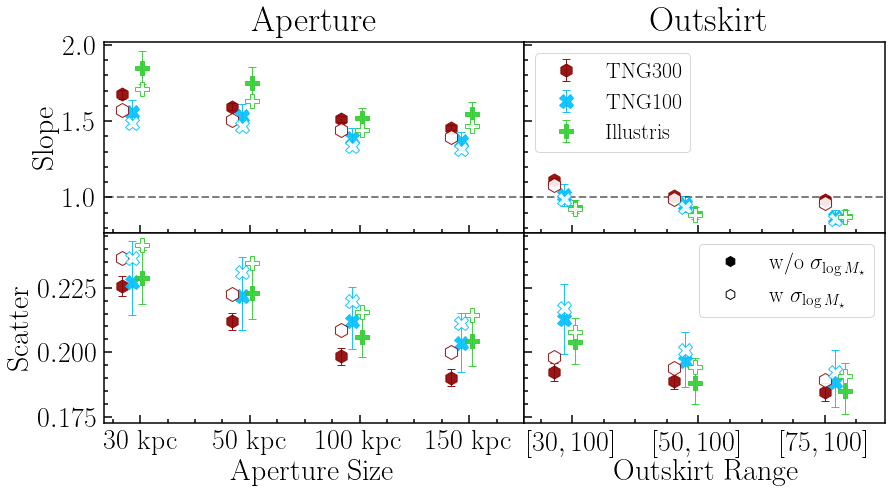

In [23]:
fig=plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(2,2, hspace=0, wspace=0,width_ratios=(0.35,0.3))
(ax11,ax21),(ax31,ax41) = gs.subplots(sharex='col', sharey='row')
projlist=['t300','t100','ori']
color_list=['darkred','deepskyblue','limegreen']
fmtlist=['h','X','P']
mksize_list=[13,14,14]

scatter_aper_tab=scatter_aper_tab0[scatter_aper_tab0['aperture_size']!=75]
slope_aper_tab=slope_aper_tab0[slope_aper_tab0['aperture_size']!=75]
slope_out_tab=slope_out_tab0
scatter_out_tab=scatter_out_tab0
scatter_aper_tab_mock=scatter_aper_tab1[scatter_aper_tab1['aperture_size']!=75]
slope_aper_tab_mock=slope_aper_tab1[slope_aper_tab1['aperture_size']!=75]
slope_out_tab_mock=slope_out_tab1
scatter_out_tab_mock=scatter_out_tab1
apersize=np.asarray([30,60,90,120])
outer=np.asarray([30,50,75])
label_list=['TNG300','TNG100','Illustris']
for ii in range(3):
    mksize=mksize_list[ii]
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    label=label_list[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab['slope_aper_gal_'+proj],yerr=slope_aper_tab['slope_aper_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=proj+'_Origin')
    err1=scatter_aper_tab['scatter_aper_gal_'+proj]-scatter_aper_tab['scatter_aper_gal_'+proj+'_err1']
    err2=scatter_aper_tab['scatter_aper_gal_'+proj+'_err2']-scatter_aper_tab['scatter_aper_gal_'+proj]
    ax31.errorbar(apersize+i0,scatter_aper_tab['scatter_aper_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab['slope_out_gal_'+proj],yerr=slope_out_tab['slope_out_gal_'+proj+'_err'],color=col, alpha=0.9, fmt=fmt,
            capsize=4, capthick=1, elinewidth=1, markersize=mksize,label=r'\rm '+label)
    err1=scatter_out_tab['scatter_out_gal_'+proj]-scatter_out_tab['scatter_out_gal_'+proj+'_err1']
    err2=scatter_out_tab['scatter_out_gal_'+proj+'_err2']-scatter_out_tab['scatter_out_gal_'+proj]
    ax41.errorbar(outer+i0,scatter_out_tab['scatter_out_gal_'+proj],yerr=(err1,err2),color=col, alpha=0.9, 
             capsize=4, capthick=1, elinewidth=1,fmt=fmt,markersize=mksize)

for ii in range(3):
    proj=projlist[ii]
    col=color_list[ii]
    fmt=fmtlist[ii]
    i0=np.asarray([ii,ii,ii,ii])*2.8
    ax11.errorbar(apersize+i0,slope_aper_tab_mock['slope_aper_gal_'+proj],mec=col,mfc='White',alpha=0.9, fmt=fmt, 
                 markersize=mksize,label=proj+'_Mock')
    ax31.errorbar(apersize+i0,scatter_aper_tab_mock['scatter_aper_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)
    i0=np.asarray([ii,ii,ii])*1.7
    ax21.errorbar(outer+i0,slope_out_tab_mock['slope_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, fmt=fmt,
             markersize=mksize)
    ax41.errorbar(outer+i0,scatter_out_tab_mock['scatter_out_gal_'+proj],mec=col,mfc='White', alpha=0.9, 
             fmt=fmt,markersize=mksize)







ax41.errorbar((10,20),(0.2,0.2),color='black',fmt='h',markersize=10,label=r'\rm w/o $\sigma_{\log{M_\star}}$')
ax41.errorbar((10,20),(0.2,0.2),mec='black',mfc='White',fmt='h',markersize=10,label=r'\rm w $\sigma_{\log{M_\star}}$')

x1=np.arange(20,180,20)
x2=np.arange(20,100,10)
ax11.plot(x1,1+0*x1,alpha=0.5,color='black',lw=2,ls='--')   
ax21.plot(x2,1+0*x2,alpha=0.5,color='black',lw=2,ls='--')




    
ax11.set_xlim(25,140)
ax21.set_xlim(25,85)
ax11.text(0.35, 1.06, r'\rm Aperture', transform=ax11.transAxes, size=35)
ax21.text(0.35, 1.06, r'\rm Outskirt', transform=ax21.transAxes, size=35)
ax31.text(0.3, -0.3, r'\rm Aperture Size', transform=ax31.transAxes, size=30)
ax41.text(0.25, -0.3, r'\rm Outskirt Range', transform=ax41.transAxes, size=30)
#ax21.text(0.45, 0.75, r'\rm Outer size $=100{\rm kpc}$', transform=ax21.transAxes, size=22)
#ax22.text(0.1, 0.75, r'\rm Outer size ', transform=ax22.transAxes, size=22)
#ax22.text(0.5, 0.6, r'$=8R_{\rm e}$', transform=ax22.transAxes, size=22)
#ax11.set_title(r'\rm Aperture',fontsize=30)
#ax31.set_xlabel(r'\rm Aperture Size/kpc',fontsize=25)
#ax32.set_xlabel(r'\rm Aperture Size/$R_{\rm e}$',fontsize=25)
ax11.set_ylabel(r'\rm Slope',fontsize=30)
ax31.set_ylabel(r'\rm Scatter',fontsize=30)
#ax21.set_title(r'\rm Outskirt [$\#$,100]kpc',fontsize=30)
ax21.legend(fontsize=22,loc=2)
#ax31.legend(fontsize=25)
ax41.legend(fontsize=22,loc=1)
#_= ax41.set_xlabel(r'\rm Outskirt Inner Size/kpc',fontsize=25)
#_= ax42.set_xlabel(r'\rm Outskirt Inner Size/$R_{\rm e}$',fontsize=25)


ax31.set_xticks([35,65,95,125],[r'$30\ {\rm kpc}$',r'$50\ {\rm kpc}$',r'$100\ {\rm kpc}$',r'$150\ {\rm kpc}$'])
ax41.set_xticks([33,54,75],[r'$[30,100]$',r'$[50,100]$',r'$[75,100]$'])




plt.savefig(fig_dir+"Poster1.png",dpi=300)